# Example for validating ECM using Haverkorn dataset

In [1]:
from equilibrator_api import ComponentContribution
from equilibrator_pathway import ThermodynamicModel
import seaborn as sns
import matplotlib.pyplot as plt
from equilibrator_pathway.ecm_model import EnzymeCostModel

sns.set_style("dark")

In [2]:
comp_contrib = ComponentContribution()

In [3]:
model = EnzymeCostModel.from_sbtab("ecoli_noor_2016_ecm.tsv", comp_contrib=comp_contrib)
model.add_validation_data("ecoli_noor_2016_reference.tsv")

In [4]:
model.ecf.params["denominator"] = "CM"

In [5]:
%%time
print("Solving ECM problem")
ecm_sol = model.optimize_ecm()
res_sbtab = ecm_sol.to_sbtab()

Solving ECM problem


d:\Anaconda\envs\dgpa\Lib\site-packages\cvxpy\expressions\expression.py:498: FutureWarning: 
    You didn't specify the order of the flatten expression. The default order
    used in CVXPY is Fortran ('F') order. This default will change to match NumPy's
    default order ('C') in a future version of CVXPY.
    To suppress this warning, please specify the order explicitly.
    
  warnings.warn(flatten_order_warning, FutureWarning)
d:\Anaconda\envs\dgpa\Lib\site-packages\cvxpy\expressions\expression.py:498: FutureWarning: 
    You didn't specify the order of the flatten expression. The default order
    used in CVXPY is Fortran ('F') order. This default will change to match NumPy's
    default order ('C') in a future version of CVXPY.
    To suppress this warning, please specify the order explicitly.
    
  warnings.warn(flatten_order_warning, FutureWarning)


CPU times: total: 203 ms
Wall time: 240 ms


d:\Anaconda\envs\dgpa\Lib\site-packages\cvxpy\expressions\expression.py:498: FutureWarning: 
    You didn't specify the order of the flatten expression. The default order
    used in CVXPY is Fortran ('F') order. This default will change to match NumPy's
    default order ('C') in a future version of CVXPY.
    To suppress this warning, please specify the order explicitly.
    
  warnings.warn(flatten_order_warning, FutureWarning)


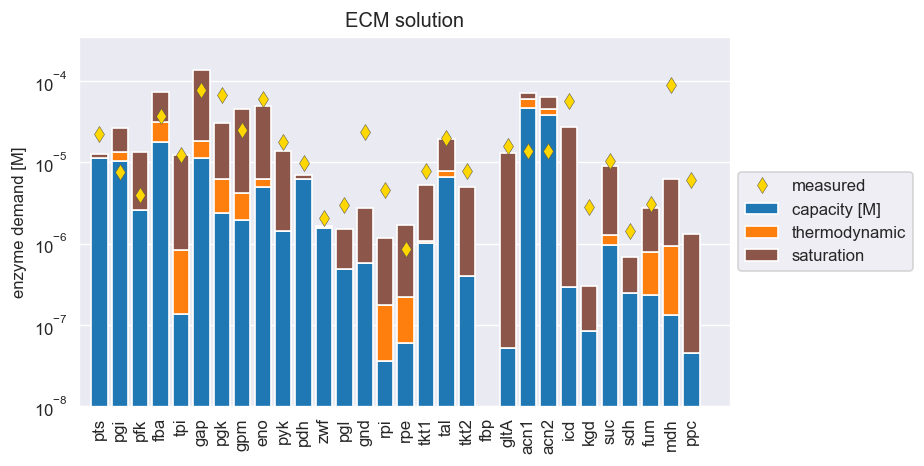

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(7, 4), dpi=120)
ax.set_title("ECM solution")
ecm_sol.plot_enzyme_demand_breakdown(ax, plot_measured=True)
ax.legend(loc="center left", bbox_to_anchor=(1, 0.5))
ax.set_ylim(1e-8, None)
ax.set_xlim(-1, None)
ax.axes.yaxis.grid(True, which="major")

d:\Anaconda\envs\dgpa\Lib\site-packages\cvxpy\expressions\expression.py:498: FutureWarning: 
    You didn't specify the order of the flatten expression. The default order
    used in CVXPY is Fortran ('F') order. This default will change to match NumPy's
    default order ('C') in a future version of CVXPY.
    To suppress this warning, please specify the order explicitly.
    
  warnings.warn(flatten_order_warning, FutureWarning)


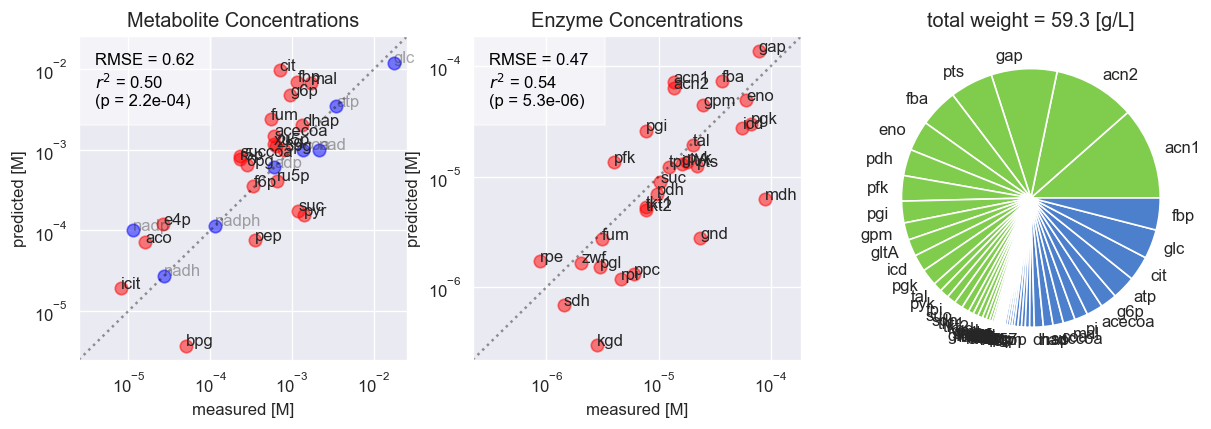

In [7]:
fig = plt.figure(figsize=(12, 3.5), dpi=120)
ax = fig.add_subplot(1, 3, 1, xscale="log", yscale="log")
ax.set_title("Metabolite Concentrations")
ecm_sol.validate_metabolite_conc(ax)

ax = fig.add_subplot(1, 3, 2, xscale="log", yscale="log")
ax.set_title("Enzyme Concentrations")
ecm_sol.validate_enzyme_conc(ax)

ax = fig.add_subplot(1, 3, 3)
ecm_sol.plot_volumes_pie(ax=ax)

In [8]:
ecm_sol.compound_df.head()

,compound_id,concentration_in_molar,lower_bound_in_molar,upper_bound_in_molar
0,glc,0.012000,0.012000,0.012
1,pep,0.000075,0.000001,0.010
2,g6p,0.004703,0.000001,0.010
3,pyr,0.000153,0.000001,0.010
4,f6p,0.000349,0.000001,0.010


In [10]:
ecm_sol.reaction_df.head()

,reaction_id,reaction_formula,flux,original_standard_dg_prime,standard_dg_prime,physiological_dg_prime,optimized_dg_prime
0,pts,glc + pep = g6p + pyr,0.5691 millimolar / second,-45.48435837095887 kilojoule / mole,-45.48435837095887 kilojoule / mole,-45.48435837095887 kilojoule / mole,-46.05109925527017 kilojoule / mole
1,pgi,g6p = f6p,0.385 millimolar / second,2.661700236513525 kilojoule / mole,2.661700236513525 kilojoule / mole,2.661700236513525 kilojoule / mole,-3.782448372533639 kilojoule / mole
2,pfk,atp + f6p = adp + fbp,0.4417 millimolar / second,-14.598831217708437 kilojoule / mole,-14.598831217708437 kilojoule / mole,-14.598831217708437 kilojoule / mole,-11.495051098480571 kilojoule / mole
3,fba,fbp = dhap + g3p,0.44702 millimolar / second,22.393224257312113 kilojoule / mole,22.393224257312113 kilojoule / mole,5.27838672259108 kilojoule / mole,-2.066421205608602 kilojoule / mole
4,tpi,dhap = g3p,0.4445 millimolar / second,5.575349871345168 kilojoule / mole,5.575349871345168 kilojoule / mole,5.575349871345168 kilojoule / mole,-0.43868883390483226 kilojoule / mole


In [12]:
ecm_sol.enzyme_df.head()

,reaction_id,capacity_in_molar,thermodynamic,saturation,allosteric,concentration_in_molar
0,pts,1.114372e-05,1.000000,1.117605,1.0,0.000012
1,pgi,1.049101e-05,1.277570,1.950043,1.0,0.000026
2,pfk,2.560773e-06,1.009756,5.234374,1.0,0.000014
3,fba,1.779392e-05,1.767704,2.320342,1.0,0.000073
4,tpi,1.361792e-07,6.162547,14.710082,1.0,0.000012


In [13]:
print(ecm_sol.to_sbtab().to_str())

!!!SBtab DocumentName='report' SBtabVersion='1.0' Date='2025-12-7'
!!SBtab TableID='Predicted concentrations' TableType='Quantity' TableName='Predicted concentrations' SBtabVersion='1.0' Unit='M'
!QuantityType	!Compound	!Value
concentration	glc	1.200e-02
concentration	pep	7.521e-05
concentration	g6p	4.703e-03
concentration	pyr	1.527e-04
concentration	f6p	3.490e-04
concentration	atp	3.449e-03
concentration	adp	6.046e-04
concentration	fbp	6.967e-03
concentration	dhap	2.018e-03
concentration	g3p	1.781e-04
concentration	pi	1.000e-02
concentration	nad	1.000e-03
concentration	nadh	2.742e-05
concentration	bpg	3.720e-06
concentration	3pg	9.779e-04
concentration	2pg	8.506e-05
concentration	h2o	1.000e+00
concentration	coa	1.000e-03
concentration	acecoa	1.495e-03
concentration	co2	1.000e-05
concentration	nadp	1.000e-04
concentration	gluc6p	1.431e-04
concentration	nadph	1.139e-04
concentration	6pg	6.398e-04
concentration	ru5p	4.122e-04
concentration	r5p	7.604e-04
concentration	xu5p	1.170e-03
conce